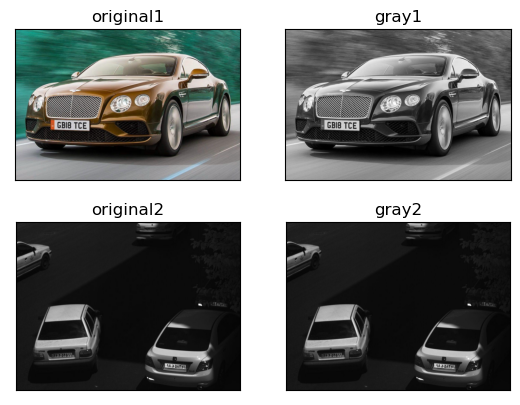

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

image1_RGB = cv2.imread('1.jpg')
image2_RGB = cv2.imread('2.jpg')
image1_Gray = cv2.cvtColor(image1_RGB, cv2.COLOR_BGR2GRAY)
image2_Gray = cv2.cvtColor(image2_RGB, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray1.jpg',image1_Gray)
cv2.imwrite('gray2.jpg',image2_Gray)

plt.figure()
plt.subplot(2,2,1)
plt.imshow(image1_RGB)
plt.title('original1')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(image1_Gray , cmap = 'gray')
plt.title('gray1')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(image2_RGB)
plt.title('original2')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(image2_Gray , cmap = 'gray')
plt.title('gray2')
plt.xticks([]), plt.yticks([])
plt.show()

# Smoothing Filters

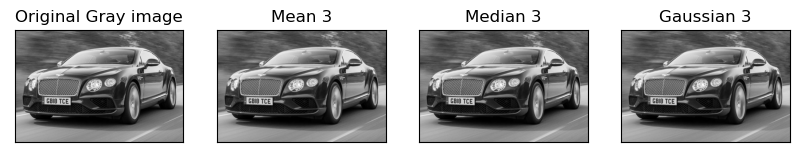

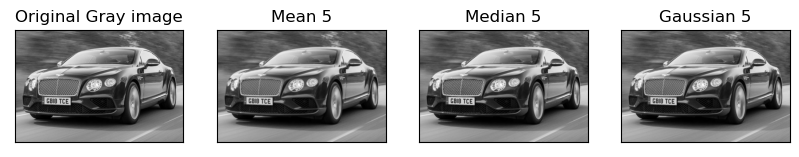

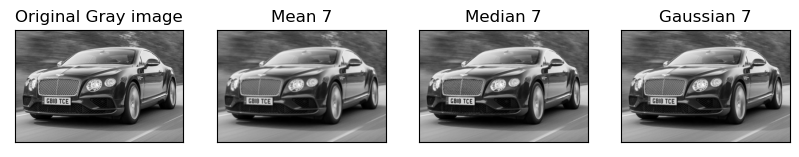

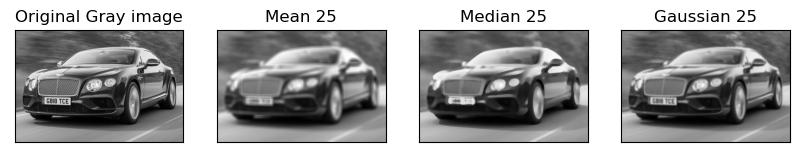

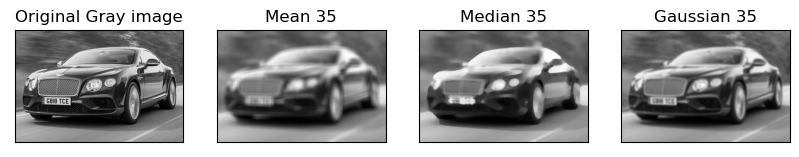

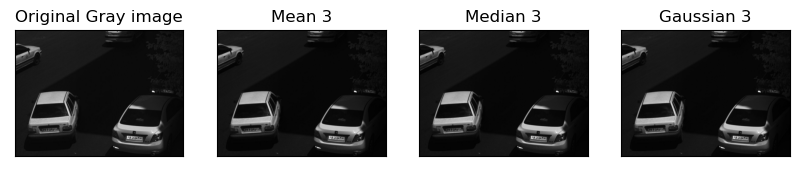

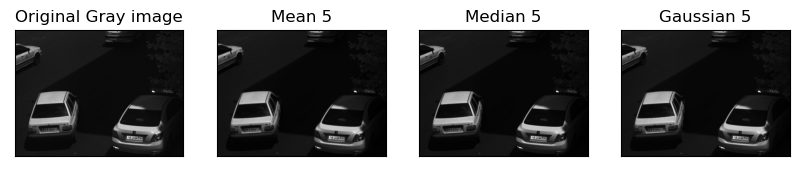

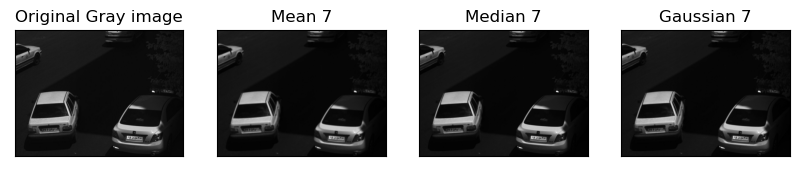

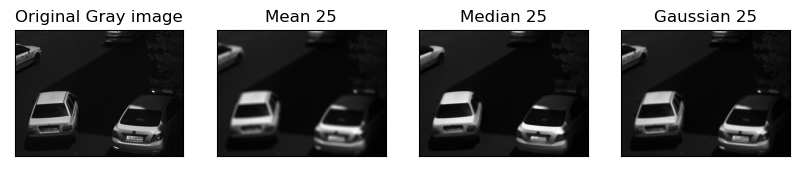

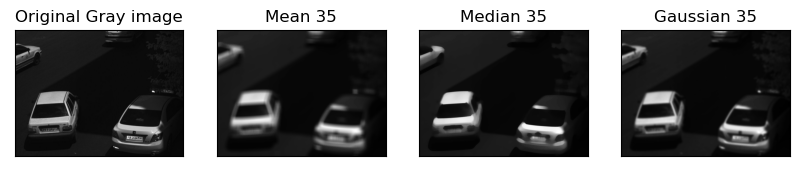

In [2]:
for img in [image1_Gray,image2_Gray]:
    for i in [3,5,7,25,35]:
        mean = cv2.blur(img,(i,i)) 
        median = cv2.medianBlur(img,i)
        g = cv2.GaussianBlur(img,(i,i),0)

        plt.figure(figsize=(10,10))
        plt.subplot(1,4,1)
        plt.imshow(img, cmap = 'gray')
        plt.title('Original Gray image')
        plt.xticks([]), plt.yticks([])

        plt.subplot(1,4,2)
        plt.imshow(mean, cmap = 'gray')
        plt.title(f'Mean {i}')
        plt.xticks([]), plt.yticks([])

        plt.subplot(1,4,3)
        plt.imshow(median, cmap = 'gray')
        plt.title(f'Median {i}')
        plt.xticks([]), plt.yticks([])

        plt.subplot(1,4,4)
        plt.imshow(g , cmap = 'gray')
        plt.title(f'Gaussian {i}')
        plt.xticks([]), plt.yticks([])
        plt.show()
    

# Prewitt and Sobel Filters

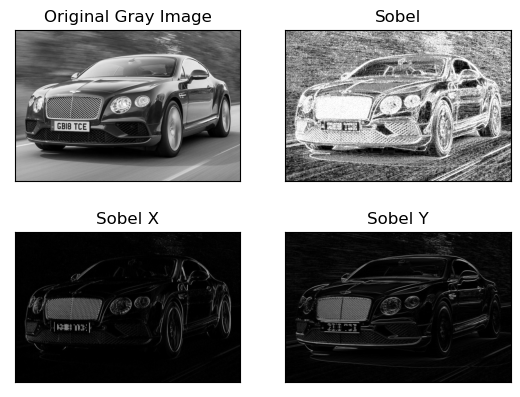

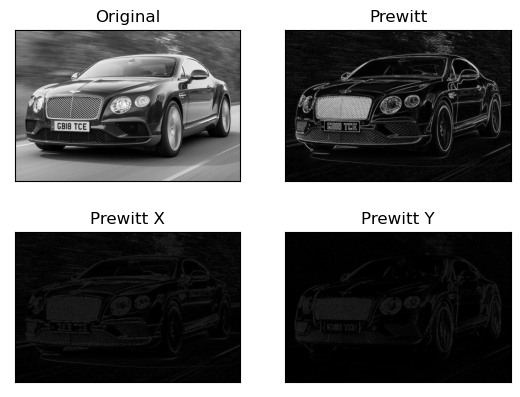

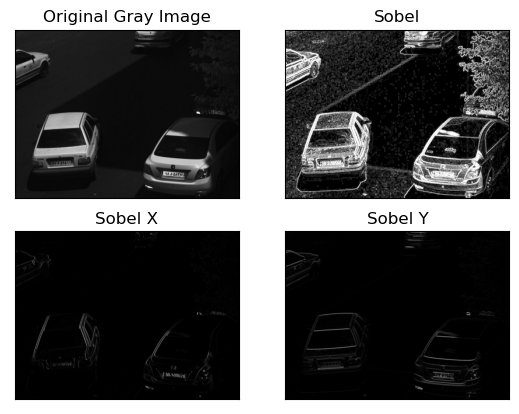

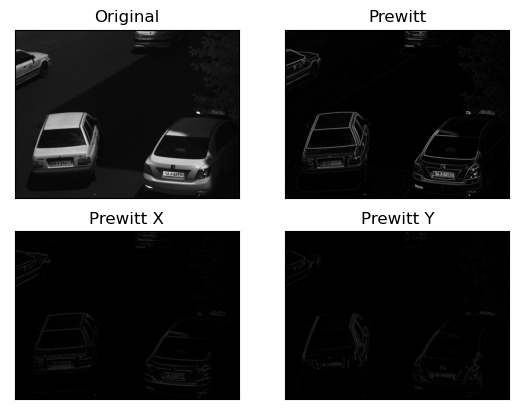

In [3]:
from pickletools import uint8


image1_Gray = cv2.imread('gray1.jpg')
image2_Gray = cv2.imread('gray2.jpg')
for img in [image1_Gray,image2_Gray]:
    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    absX = cv2.convertScaleAbs(sobelx)
    absY = cv2.convertScaleAbs(sobely)
    sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

    plt.figure()
    plt.subplot(2,2,1),
    plt.imshow(img,cmap = 'gray')
    plt.title('Original Gray Image')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(2,2,2)
    plt.imshow(sobel,cmap = 'gray')
    plt.title('Sobel')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(2,2,3)
    plt.imshow(cv2.absdiff(sobelx*255/sobelx.max(), 0).astype(np.uint8))
    plt.title('Sobel X')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(2,2,4)
    plt.imshow(cv2.absdiff(sobely*255/sobely.max(), 0).astype(np.uint8))
    plt.title('Sobel Y')
    plt.xticks([]), plt.yticks([])
    plt.show()

    kernelx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]],dtype=int)
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)
    Prewittx = cv2.filter2D(img, cv2.CV_16S, kernelx)
    Prewitty = cv2.filter2D(img, cv2.CV_16S, kernely)
    absX = cv2.convertScaleAbs(Prewittx)
    absY = cv2.convertScaleAbs(Prewitty)
    Prewitt = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

    plt.figure()
    plt.subplot(2,2,1)
    plt.imshow(img,cmap = 'gray')
    plt.title('Original')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(2,2,2)
    plt.imshow(Prewitt,cmap = 'gray')
    plt.title('Prewitt')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(2,2,3)
    plt.imshow(cv2.absdiff(Prewittx*255/Prewittx.max(), 0).astype(np.uint8))
    plt.title('Prewitt X')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(2,2,4)
    plt.imshow(cv2.absdiff(Prewitty*255/Prewitty.max(), 0).astype(np.uint8))
    plt.title('Prewitt Y')
    plt.xticks([]), plt.yticks([])
    plt.show()

# Canny Filter

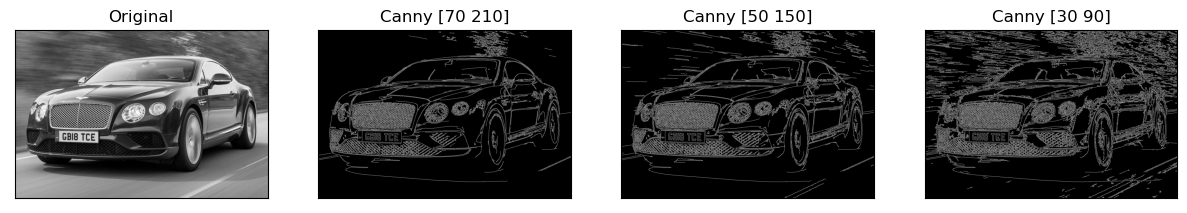

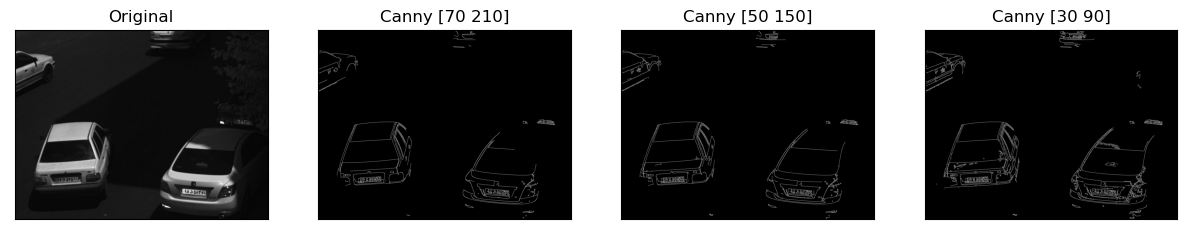

In [4]:
image1_Gray = cv2.imread('gray1.jpg')
image2_Gray = cv2.imread('gray2.jpg')
for img in [image1_Gray,image2_Gray]:
    canny1 = cv2.Canny(img,70,210)
    canny2 = cv2.Canny(img,50,150)
    canny3 = cv2.Canny(img,30,90)

    plt.figure(figsize=(15,10))
    plt.subplot(1,4,1)
    plt.imshow(img,cmap = 'gray')
    plt.title('Original')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(1,4,2)
    plt.imshow(canny1,cmap = 'gray')
    plt.title('Canny [70 210]'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(1,4,3)
    plt.imshow(canny2,cmap = 'gray')
    plt.title('Canny [50 150]')
    plt.xticks([]), plt.yticks([])

    plt.subplot(1,4,4)
    plt.imshow(canny3,cmap = 'gray')
    plt.title('Canny [30 90]')
    plt.xticks([]), plt.yticks([])
    plt.show()